In [53]:
#!/usr/bin/env python
import rospy
import matplotlib as mpl
import matplotlib.pyplot as plt
import time

import numpy as np
import cv2

In [3]:
from nav_msgs.msg import OccupancyGrid, MapMetaData

map_load_time: 
  secs: 0
  nsecs:         0
resolution: 0.20000000298023224
width: 481
height: 306
origin: 
  position: 
    x: -49.6
    y: -36.00000152587891
    z: 0.0
  orientation: 
    x: 0.0
    y: 0.0
    z: 0.0
    w: 0.0


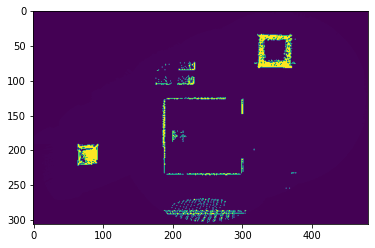

In [4]:
def callback(data):
    global img
    meta = data.info
    print(meta)
    imgdata = np.array(data.data)
    img = imgdata.reshape((meta.height,meta.width))
    img = img+1

    plt.imshow(img)

    

def detection():
    # In ROS, nodes are uniquely named. If two nodes with the same
    # name are launched, the previous one is kicked off. The
    # anonymous=True flag means that rospy will choose a unique
    # name for our 'listener' node so that multiple listeners can
    # run simultaneously.
    rospy.init_node('listener', anonymous=True)

    rospy.Subscriber("/projected_map", OccupancyGrid, callback)

    # spin() simply keeps python from exiting until this node is stopped
    rospy.spin()

if __name__ == '__main__':
    detection()

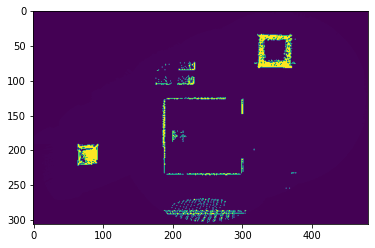

In [50]:
# bin = cv.Canny(img, 0, 50, apertureSize=5)
# bin = cv.dilate(bin, None)
plt.imshow(img)
# plt.imshow(bin)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


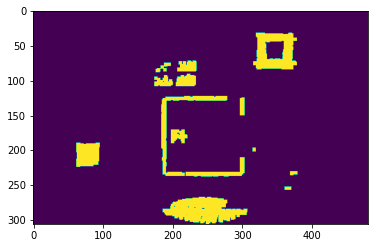

In [6]:
bin = img>100
bin.dtype='uint8'
kernel = np.ones((5,5),np.uint8)
imgfiltered = cv2.dilate(bin,kernel,iterations = 1)
plt.imshow(imgfiltered)
print(bin)

In [54]:
start = time.time()
bin = img>1
bin.dtype='uint8'
kernel = np.ones((5,5),np.uint8)
imgfiltered = cv2.dilate(bin,kernel,iterations = 1)

im_floodfill = imgfiltered.copy()
h, w = bin.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(im_floodfill, mask, (0,0), 255)
im_floodfill_inv = cv2.bitwise_not(im_floodfill)
im_out = bin | im_floodfill_inv
im_out = cv2.erode(im_out,kernel,iterations = 1)

contours, hierarchy = cv2.findContours(im_out,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
im2 = im_out.copy()
# im2 = im_out.copy()
backtorgb = cv2.cvtColor(im_out,cv2.COLOR_GRAY2RGB)

cnts = []

for data in contours:
    if cv2.contourArea(data) > 300:
        x,y,w,h = cv2.boundingRect(data)
        cv2.rectangle(backtorgb,(x,y),(x+w,y+h),(0,255,0),2)

        cnts.append(data)
        # cv2.drawContours(backtorgb,[data],-1,(0,255,0),5)
    # print ("The contours have this data" + str(data))

end = time.time()
print(end-start)

0.004170417785644531


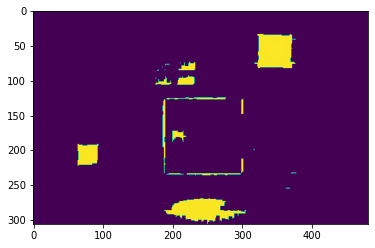

In [24]:
im_floodfill = imgfiltered.copy()

h, w = bin.shape[:2]

mask = np.zeros((h+2, w+2), np.uint8)

cv2.floodFill(im_floodfill, mask, (0,0), 255)

im_floodfill_inv = cv2.bitwise_not(im_floodfill)

im_out = bin | im_floodfill_inv

kernel = np.ones((5,5),np.uint8)
im_out = cv2.erode(im_out,kernel,iterations = 1)
plt.imshow(im_out)


241  285
77  205
346  57


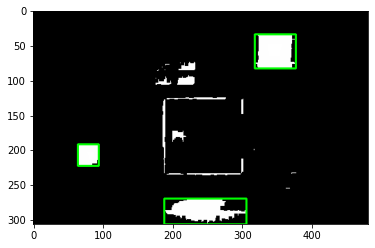

In [49]:
contours, hierarchy = cv2.findContours(im_out,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
im2 = im_out.copy()
# im2 = im_out.copy()
backtorgb = cv2.cvtColor(im_out,cv2.COLOR_GRAY2RGB)

for data in contours:
    if cv2.contourArea(data) > 300:
        x,y,w,h = cv2.boundingRect(data)
        cv2.rectangle(backtorgb,(x,y),(x+w,y+h),(0,255,0),2)
        M = cv2.moments(data)
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        print (f"{cx}  {cy}")
        # cv2.drawContours(backtorgb,[data],-1,(0,255,0),5)
    # print ("The contours have this data" + str(data))

plt.imshow(backtorgb)


# x,y,w,h = cv2.boundingRect(contours)
# cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
